In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

# Import breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
print(X.shape)

(569, 30)


In [2]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an Extra Trees classifier. 
# This classifier fits a number of randomized decision trees (a forest) on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting.
# 'n_estimators=100' specifies that 100 trees should be grown in this forest
# 'random_state=42' makes the randomness deterministic, allowing for reproducible results each time the code is run.
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier. 
# The 'fit' method is used to train the model using the training data. 
# 'X' represents the features from the training data, and 'y' represents the labels.
clf = clf.fit(X, y)

# Output the feature importances.
# After being trained, the classifier has an attribute 'feature_importances_' which gives the importance of each feature.
# These importances are output to the console when the 'print' function is called.
print(clf.feature_importances_)

[0.06332666 0.02127486 0.03460791 0.05209977 0.01049334 0.02841893
 0.05655667 0.0721787  0.00765354 0.00717852 0.02817644 0.00468379
 0.02100093 0.03687671 0.00559261 0.00754089 0.00655527 0.0104857
 0.00553549 0.00674571 0.11382619 0.02251086 0.09066648 0.07906783
 0.0211418  0.02709816 0.04675776 0.08921408 0.01285512 0.00987928]


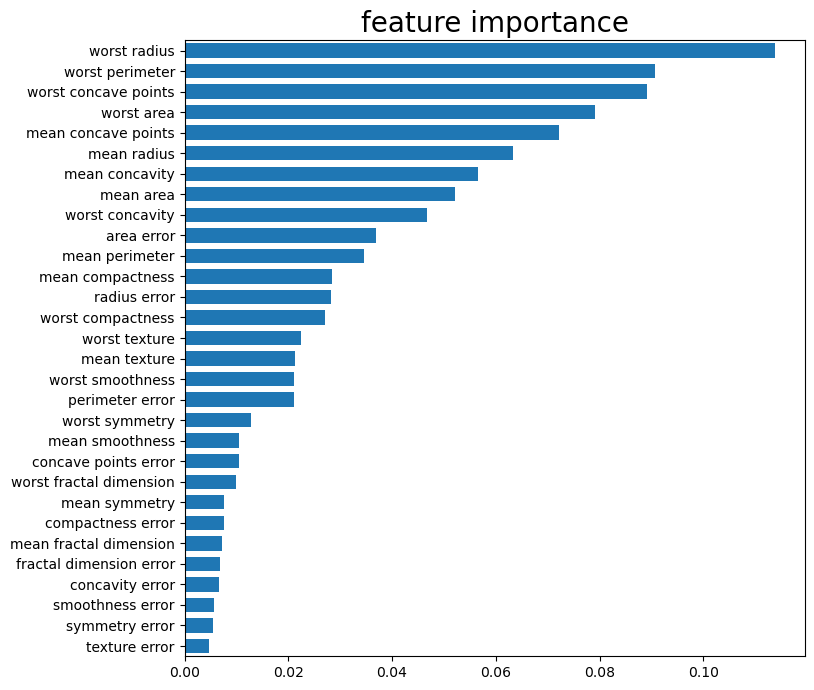

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the feature importances in ascending order and get the indices
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)

# Create array of indices as float values which are offset by 0.5 to center align the labels
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# Initialize a figure object with a size of 8 by 8 inches
fig = plt.figure(figsize = (8,8))

# Add a subplot to the figure with 1 row, 1 column, and the first plot
ax1 = fig.add_subplot(1,1,1)

# Create a horizontal bar chart where the bar heights are the feature importances
# and use the sorted indices to order the bars
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)

# Set the y-ticks to be at the center of each bar in the horizontal bar chart
ax1.set_yticks(tree_indices)

# Label the y-ticks with the feature names, ordering by the sorted indices
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])

# Set the limits of the y-axis to go from 0 to the number of features
ax1.set_ylim((0, len(clf.feature_importances_)))

# Set the title of the plot to 'feature importance' with a font size of 20
ax1.set_title('feature importance', fontsize = 20)

# Display the plot
plt.show()

In [4]:
# Import the 'SelectFromModel' class from the 'feature_selection' module of the 'sklearn' library.
# This class is used to select features based on the importance weights of another model.
from sklearn.feature_selection import SelectFromModel

# Initialize the 'SelectFromModel' with the classifier 'clf'.
# The 'prefit=True' parameter indicates that 'clf' is already trained and ready to be used.
# 'model' will use the feature importances from 'clf' to determine which features to select.
model = SelectFromModel(clf, prefit=True)

# Transform the feature matrix 'X' using the initialized 'SelectFromModel' instance.
# This reduces 'X' to a subset of its original features, selecting only the ones
# deemed important by the 'clf' classifier. The result is a new feature matrix 'X_new'
# that contains only the selected features.
X_new = model.transform(X)

 
# Show the dimensions after selection
print(X_new.shape)

(569, 11)
